In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import banana_lib as sz
from scipy.optimize import curve_fit


plt.rcParams.update({'font.size': 18})
plt.rcParams.update({"text.usetex": True})



C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.28.txt
A = 0.0015334373465677122 
lambda = 28.04225595988468
var_A = 0.0002536148581543492 
var_lambda = 477.2953337799425
C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.29.txt
A = 0.002088749568653439 
lambda = 0.8732527767071835
var_A = 0.00037197747475000884 
var_lambda = 0.5823293773083557
C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.3.txt
A = 0.005204807456394252 
lambda = 0.5226208180888624
var_A = 0.0007371474553394304 
var_lambda = 0.1875301779436913
C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.305.txt
A = 0.009346352893957561 
lambda = 0.24494251606524492
var_A = 0.0009180271860911839 
var_lambda = 0.04151658719719077
C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.308.txt
A = 0.023440820044817436 
lambda = 0.1796080706874727
var_A = 0.002004697096460806 
var_lambda = 0.024945042223844947
C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_scr

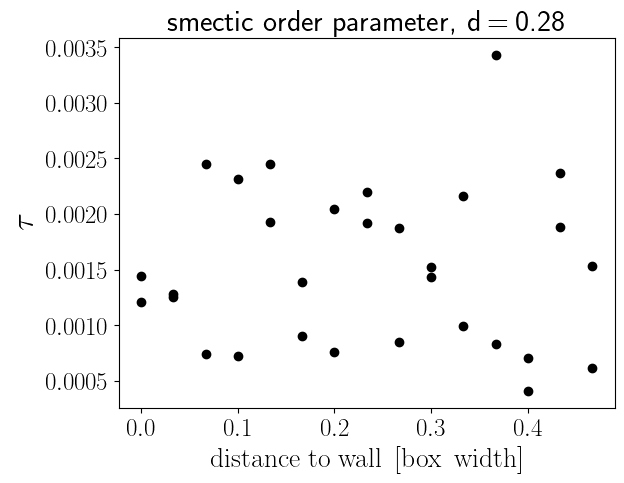

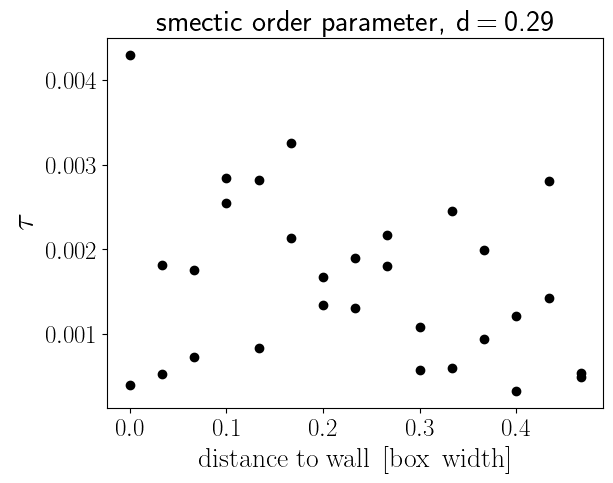

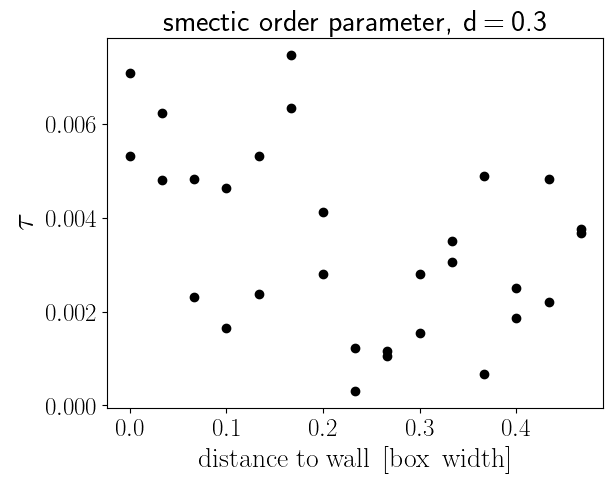

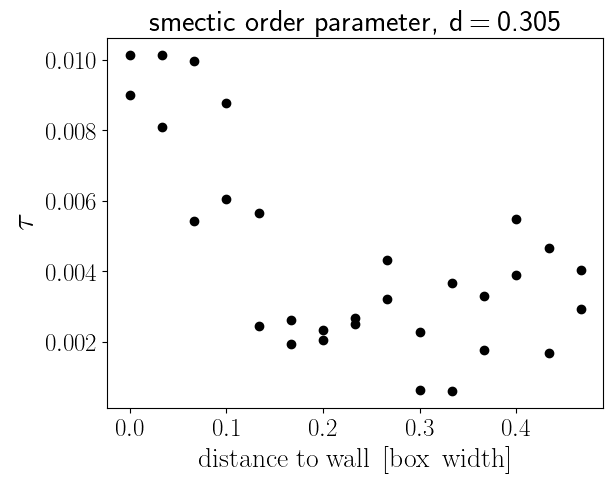

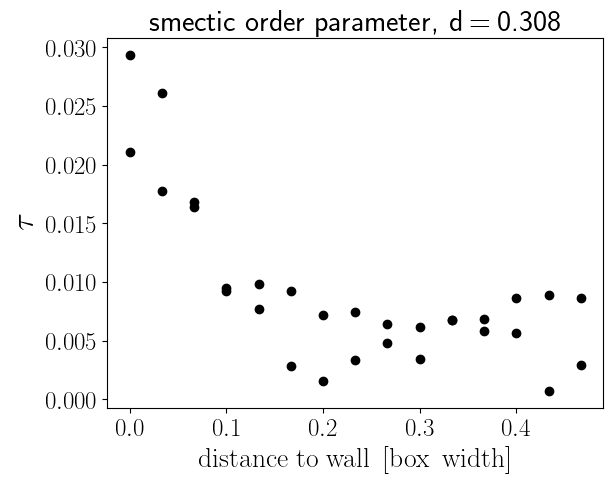

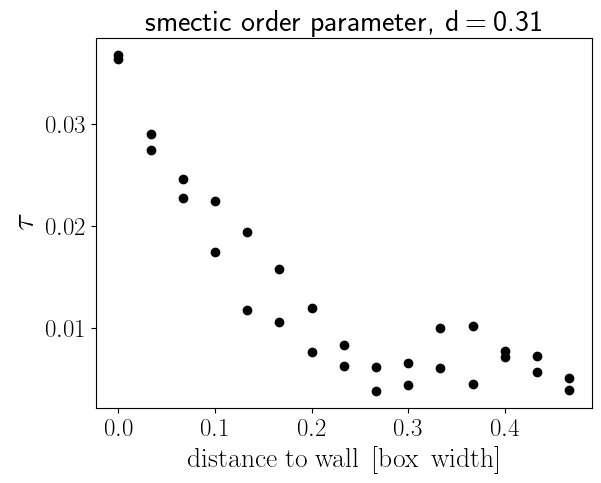

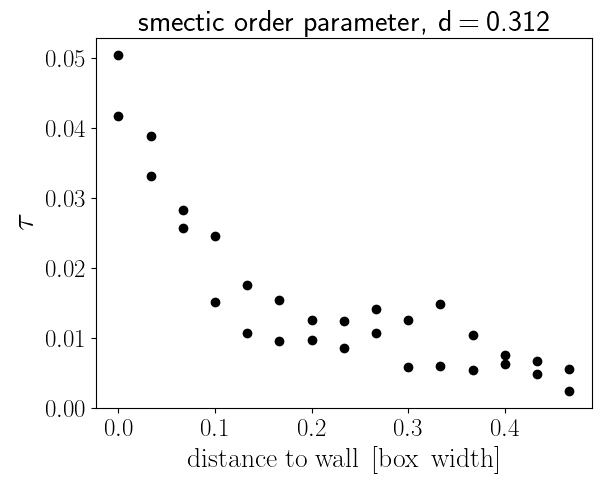

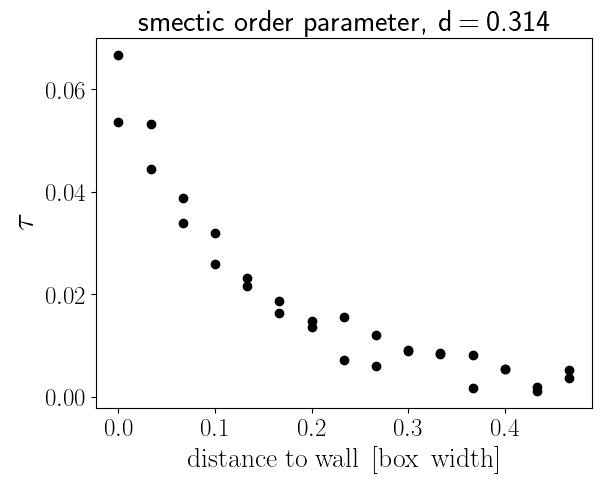

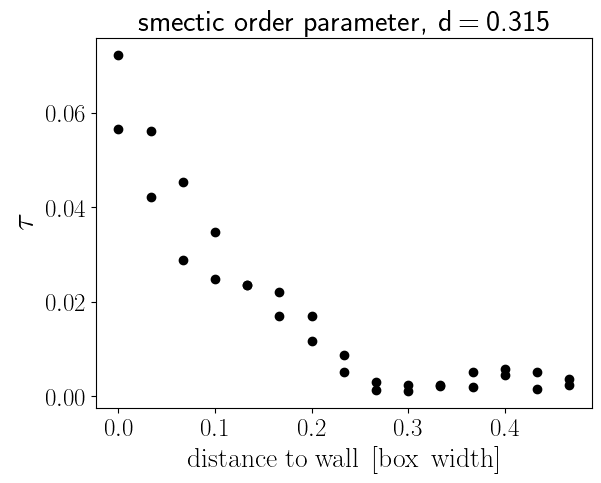

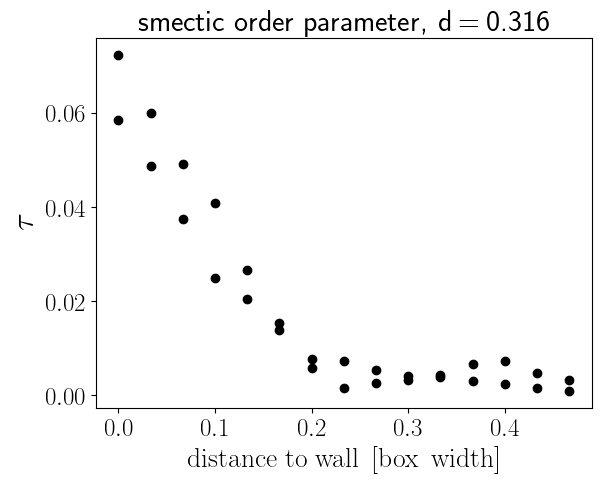

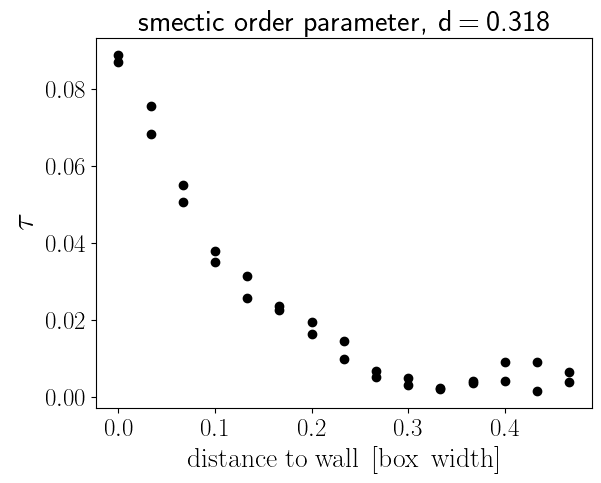

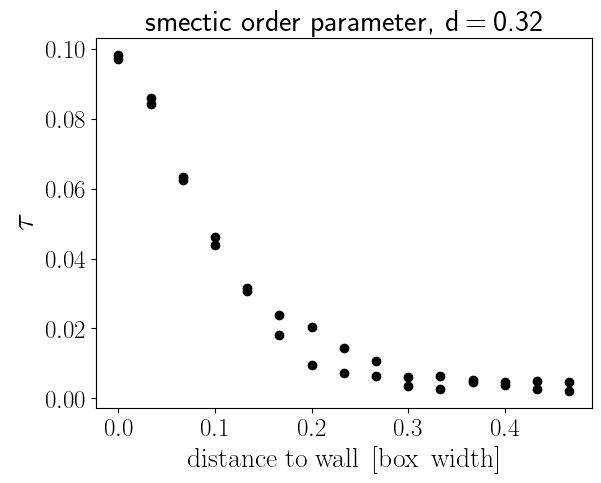

In [2]:
N_SLICES = 30
DIRECTOR_PERIODS = 1
SMECTIC_PERIODS = 4
BOX_X = 70/8.62

def create_plot(location, target):
    # get packing fraction from file name 
    if type(location) == os.DirEntry: 
        location = location.name

    density = location.split("_")[-1].split(".")
    density = f"{density[0]}.{density[1]}"

    # create lists for plotting local smectic parameters
    smectic_params = sz.read_matrix(location, N_SLICES, SMECTIC_PERIODS)

    # data for plotting in box size units of length
    # print(smectic_params)
    y_axis = np.abs(smectic_params)
    x_axis = [i / N_SLICES for i in range(N_SLICES//2)]
    x_axis.extend([i / N_SLICES for i in reversed(range(N_SLICES//2))])

    # curve fitting
    # popt, pvar = curve_fit(lambda x, A, L: A*np.exp(-x / L), x_axis, y_axis, sigma=[0.005]*len(x_axis), absolute_sigma=True)
    # popt[1] *= box.x / x     # rescale pixels to atom diameters
    popt, pvar = curve_fit(lambda x, A, L: A*np.exp(-x / L), x_axis, y_axis, absolute_sigma=False)
    print(f"A = {popt[0]} \nlambda = {popt[1]}")
    print(f"var_A = {np.sqrt(pvar[0][0])} \nvar_lambda = {np.sqrt(pvar[1][1])}")
    
    with open(target, "a") as t:
        print(f"d = {density}", file=t)
        print(f"A = {popt[0]} \nvarA = {np.sqrt(pvar[0][0])} \nlambda = {popt[1]} \nvarLambda = {np.sqrt(pvar[1][1])} \n", file=t)

    # exponential plot
    plt.figure()
    plt.scatter(x_axis , y_axis, c='black')
    plt.xlabel(r"$\mathrm{distance\;to\;wall\;\,[box\;\,width]}$", fontsize=20)
    plt.ylabel(r"$\tau$", fontsize=24)
    plt.title(r'smectic order parameter, d\:=\:{}'.format(density))
    # plt.savefig(f"smectic_order_parameter_{density}.jpg")
    # plt.show()



path = r"C:\Users\Szymek\Desktop\LAMMPS_matrices"
target = r"C:\Users\Szymek\Desktop\smectic_params_new.txt"


with open(target, "w+") as t: print('', end='', file=t)   # clear file

for file in os.scandir(path):
    file = path + '\\' + file.name
    print(file)
    create_plot(file, target)


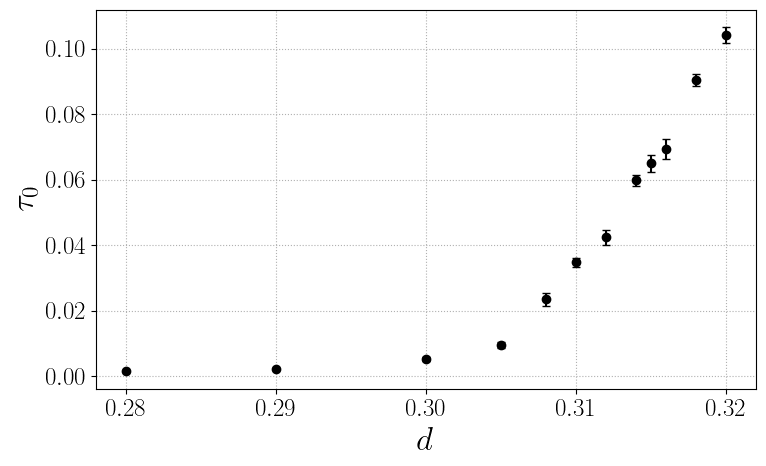

In [9]:
location = "C:/Users/Szymek/Desktop/smectic_params_new.txt"

x = 150
density, lambd, varLambd, amplitude, varAmplitude = [], [], [], [], []

with open(location, "r") as f:
    for line in f:
        line = line.strip().split("=")
        # print(line)
        if line[0] == "d ":
            density.append(line[-1])
        elif line[0] == "A ": 
            amplitude.append(line[-1])
        elif line[0] == "varA ":
            varAmplitude.append(line[-1])
        elif line[0] == "lambda ":
            # clamp correlation length to 300 pixels for readability
            l = line[-1]
            if float(l) > 7.:
                l = 7.
            lambd.append(l)
        elif line[0] == "varLambda ": 
            l = line[-1]
            if float(l) > 0.5:
                l = 0.5
            varLambd.append(l)
        else:
            continue
density = np.array(density, dtype=float)
amplitude = np.array(amplitude, dtype=float)
Damplitude = np.array(varAmplitude, dtype=float)
lambd = np.array(lambd, dtype=float)
Dlambd = np.array(varLambd, dtype=float)
# lambd *= 1/7      # rescale correlation length from pixels to box width



plt.figure(figsize=(8, 5))
# plt.scatter(density, amplitude, )
plt.errorbar(density, amplitude, yerr=Damplitude, fmt='o', capsize=3, c='black', ecolor = "black", label="tau")
plt.xlabel(r'$d$', fontsize=24)
plt.ylabel(r'$\tau_0$', fontsize=24)
plt.grid(linestyle='dotted')
plt.tight_layout()
# plt.title(f"smectic order parameter at wall")
# plt.show()
plt.savefig(f"C:/Users/Szymek/Desktop/checkpoint_01.03.24/images/smectic_params_vs_density.png", dpi=300)


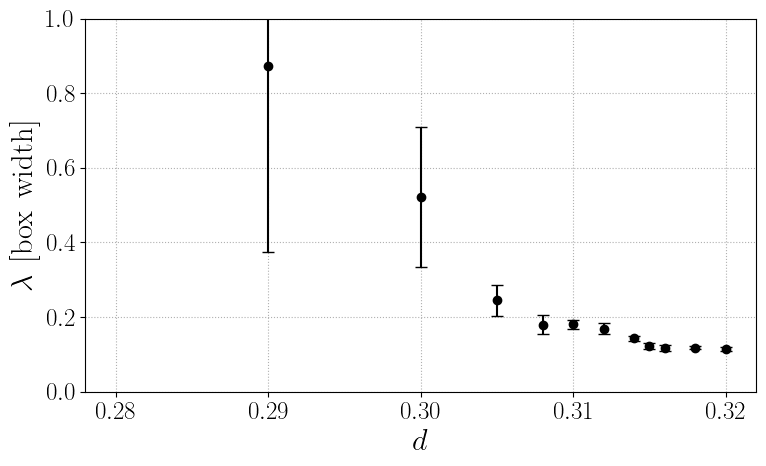

In [11]:
plt.figure(figsize=(8, 5))
plt.errorbar(density[:], lambd[:], yerr=Dlambd[:], fmt='o', capsize=4, c='black', ecolor = "black")
plt.xlabel(r'$d$', fontsize=22)
plt.ylabel(r"$\lambda  \hspace{0.3cm}\mathrm{[box\;\,width]}$", fontsize=22)
plt.ylim(0, 1)
plt.grid(linestyle='dotted')
plt.tight_layout()

# plt.show()
plt.savefig(f"C:/Users/Szymek/Desktop/checkpoint_01.03.24/images/correlation_lengths_vs_density.png", dpi=300)

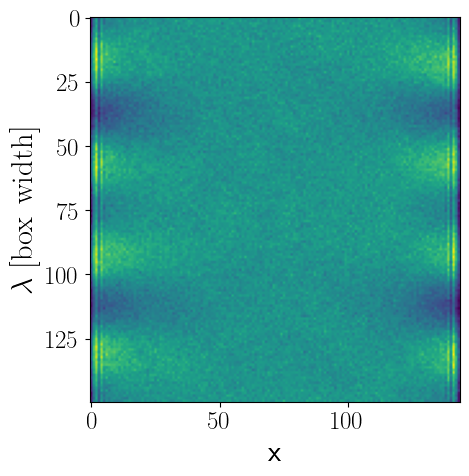

In [20]:
file = r"C:\Users\Szymek\Desktop\LAMMPS_matrices\centers_screen_bulk_6k_0.32.txt"

with open(file, "r") as f:
    matrix = [float(line.split()[-1]) for line in f]
    matrix = np.array(matrix).reshape([int(np.sqrt(len(matrix))), -1])

plt.figure(figsize=(8, 5))
plt.imshow(matrix[:,3:-3], cmap="viridis")
plt.xlabel(r"x", fontsize=22)
plt.ylabel(r"$\lambda\;\mathrm{[box\;\,width]}$", fontsize=22)
plt.show()

Text(0.5, 1.0, '\\TeX\\ is Number $\\displaystyle\\sum_{n=1}^\\infty\\frac{-e^{i\\pi}}{2^n}$!')

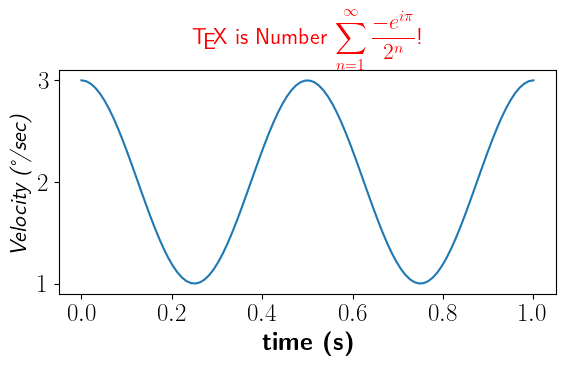

In [ ]:
plt.rcParams['text.usetex'] = True


t = np.linspace(0.0, 1.0, 100)
s = np.cos(4 * np.pi * t) + 2

fig, ax = plt.subplots(figsize=(6, 4), tight_layout=True)
ax.plot(t, s)

ax.set_xlabel(r'\textbf{time (s)}')
ax.set_ylabel('\\textit{Velocity (\N{DEGREE SIGN}/sec)}', fontsize=16)
ax.set_title(r'\TeX\ is Number $\displaystyle\sum_{n=1}^\infty'
             r'\frac{-e^{i\pi}}{2^n}$!', fontsize=16, color='r')